<table width = "100%">
  <tr style="background-color:white;">
    <!-- QWorld Logo -->
    <td style="text-align:left;width:200px;"> 
        <a href="https://qworld.net/" target="_blank"><img src="../images/QWorld.png"> </a></td>
    <td style="text-align:right;vertical-align:bottom;font-size:16px;"> 
        Prepared by <a href="https://www.cmpe.boun.edu.tr/~ozlem.salehi/" target="_blank"> Özlem Salehi </a> </td>
    </tr> 
 </table>
 
<hr>

# Quantum Annealing on D-Wave

Finally, we have reached to the point where we will access D-Wave devices and run our codes on real machines instead of using simulated annealing. 

<div class="alert alert-block alert-info">
If you delete the outputs of the cells, you may get different results than discussed here when you run it again.    
</div>

### Imports

In [19]:
from dimod import BQM
from dwave.system import DWaveSampler, EmbeddingComposite
import numpy as np
import networkx as nx
from bqm_utils import graph_viz

Let's start with a very simple example.

You can observe that instead of `SimulatedAnnealingSampler`, we create an instance of `DWaveSampler`. Functions for obtaining the sample, i.e. `sample`, `sample_qubo`, `sample_ising` are the same for both samplers.

When you call the function `DWaveSampler`, it returns you the QPU named D-Wave Advantage 4.1. Advantage QPUs has 5640 qubits with Pegasus topology and 4.1 is the version with performance update. The earlier QPU was named D-Wave 2000 and currently D-Wave is working on D-Wave Advantage 2. You can read more about D-Wave QPUs [here](https://docs.dwavesys.com/docs/latest/c_gs_4.html).


<div class="alert alert-block alert-info">
Note that when you run a problem on D-Wave, your credits are reduced.
    
</div>

In [1]:
sampler = DWaveSampler()

quadratic = {('s_1', 's_2'): 4}
vartype = 'SPIN'

bqm = BQM(quadratic, vartype)

sampleset = sampler.sample(bqm, num_reads=10)
print(sampleset)

BinaryQuadraticModelStructureError: Problem graph incompatible with solver. Please use 'EmbeddingComposite' to map the problem graph to the solver.

However, when you run the code you will encounter an error

> BinaryQuadraticModelStructureError: Problem graph incompatible with solver. Please use 'EmbeddingComposite' to map the problem graph to the solver.


The problem is that there are no qubits named `s_1` and `s_2` on the real device. 

Let's get the node list of the real device:

In [10]:
sampler.nodelist

[30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 205,
 206,
 207,
 2

This time let's input 30 and 31 as our qubit names.

In [11]:
from dimod import BQM

from dwave.system import DWaveSampler
sampler = DWaveSampler()

quadratic = {(30, 31): 4}
vartype = 'SPIN'

bqm = BQM(quadratic, vartype)

sampleset = sampler.sample(bqm, num_reads=10)
print(sampleset)

  30 31 energy num_oc.
0 -1 +1   -4.0       9
1 +1 -1   -4.0       1
['SPIN', 2 rows, 10 samples, 2 variables]


You see that it worked! Let's try another one.

In [14]:
from dimod import BQM

from dwave.system import DWaveSampler
sampler = DWaveSampler()

quadratic = {(30, 31): 4, (30, 32):4, (31, 32):4}
vartype = 'SPIN'

bqm = BQM(quadratic, vartype)

sampleset = sampler.sample(bqm, num_reads=10)
print(sampleset)

BinaryQuadraticModelStructureError: Problem graph incompatible with solver. Please use 'EmbeddingComposite' to map the problem graph to the solver.

We again encoounter an error. What is the reason?

Note that not all the qubits are connected to each other. You may try to get the adjacency list for the D-Wave machine and encode your qubits accordingly. 

However, there exist no three qubits which are mutually connected. 

<img src="../images/chimera.png" width="200">

Yet, the bqm we have created requires such connection to be implemented.

The solution is known as **minor embedding**.

## Minor Embedding

When we define a binary quadratic model, the variables we use are called *logical qubits*. Logical qubits need to be mapped to the *physical qubits* in the actual device. This process is known as the *minor embedding*.

<img src="../images/minor1.png" width="800">


Two-variable problem, shown on the left as a graph, is embedded in two connected qubits on a D-Wave 2000, shown on the right. Variable , highlighted in dark magenta, is represented by qubit number 1929 and variable  is represented by qubit 1801. (Taken from D-Wave)

### Chains

Not all connections are available on the real device. To overcome this, each logical qubit, may be represented by either one or more than one physical qubit on the actual device. 

<img src="../images/minor2.png" width="800">


For the Ising model $4s_1s_2+4s_2s_3+4s_1s_3$, we need to allocate 4 qubits in the actual device. The two qubits in pink represent the same qubit and they are called a *chain*.

The coupling between them is called the *chain strength*. The chain strength should be set high enough so the two qubits always get the same value and act if as they are a single qubit. On the other hand, too high chain strength may override the problem itself.

Now the question is how to perform minor embedding?

Ocean SDK provides a functionality so that you can automatically embed your problems to the device. This is how you should create your sampler. 

In [8]:
from dwave.system import EmbeddingComposite

sampler = EmbeddingComposite(DWaveSampler())

Now, let's run our problem.

In [74]:
from dimod import BQM

linear = {'x1': -5, 'x2': -3, 'x3': -8, 'x4': -6}
quadratic = {('x1', 'x2'): 4, ('x1', 'x3'): 8, ('x2', 'x3'): 2, ('x3', 'x4'): 10}
vartype = 'BINARY'

bqm = BQM(linear, quadratic, vartype)

sampleset = sampler.sample(bqm, num_reads=10)
print(sampleset)

  x1 x2 x3 x4 energy num_oc. chain_.
0  1  0  0  1  -11.0       7     0.0
1  1  1  0  1  -10.0       1     0.0
2  0  1  1  0   -9.0       1     0.0
3  0  0  1  0   -8.0       1     0.0
['BINARY', 4 rows, 10 samples, 4 variables]


In this example, the number of reads was set to 10. We have two samples in the sampleset, one with energy -11, which occurs 9 times and 1 with energy -1 occuring only once. 

Any bqm you run on D-Wave is first converted into an Ising model and then scaled so that $h$ and $J$ values are within some bound determined by the properties of the machine. This is done by default and you don't need to worry about it.

<div class="alert alert-block alert-info">
Note that quantum annealing is a probabilistic method and you may get different output every time you run it, especially when you run a large instance.    
</div>


## Parameters

Now let us see some of the parameters of the D-Wave samplers we can play around with. 

### Number of reads

Number of reads which is provided as a parameter `num_reads` to sampler, determines the number of samples in the sampleset. The more samples you have, more accurate result you get, especially for large instances.

Let us see an example.

We will solve the TSP for the following graph which we have defined previously.

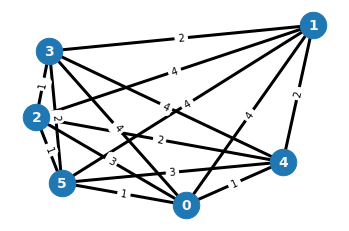

In [9]:
np.random.seed(45)
N = 6
G1 = nx.complete_graph(N)
for u, v in G1.edges():
    G1[u][v]["weight"] = np.random.randint(1, 5)

graph_viz(G1)

Let us create the BQM for the given graph using the function we have written previously. We will also use the helper functions.

In [3]:
def tsp_bqm(G, P):
    
    N = len(G.nodes)
    bqm = BQM("BINARY")
    for i in range(N):
        for j in range(N):
            if i!=j:
                for t in range(N-1):
                    bqm.add_quadratic(f"x_{i}_{t}", f"x_{j}_{t+1}", G[i][j]["weight"])

                #Remember that we were assuming N=0 in the sum
                bqm.add_quadratic(f"x_{i}_{N-1}", f"x_{j}_{0}", G[i][j]["weight"])
    #Add the first constraint
    for t in range(N):
        c1 = [(f"x_{i}_{t}", 1) for i in range(N)] #coefficient list
        bqm.add_linear_equality_constraint(c1, constant=-1, lagrange_multiplier=P)
    #Add the second constraint
    for i in range(N):
        c2 = [(f"x_{i}_{t}", 1) for t in range(N)]
        bqm.add_linear_equality_constraint(c2, constant=-1, lagrange_multiplier=P)
    return bqm

def is_sample_feasible(sample,N):
    for i in range(N):
        if sum(sample[f"x_{i}_{t}"] for t in range(N))!=1:
            return False
    for t in range(N):
        if sum(sample[f"x_{i}_{t}"] for i in range(N))!=1:
            return False
    return True

def sample_to_path(sample,N):
    path = []
    for t in range(N):
        for i in range(N):
            if sample[f"x_{i}_{t}"] == 1:
                path.append(i)
    return path

Now, let's call the function and create the sampler.

In [18]:
bqm_1 = tsp_bqm(G1, 5)
sampler = EmbeddingComposite(DWaveSampler())

We will check what happens if the number of reads is set to 10.

In [66]:
sampleset_10 = sampler.sample(bqm_1, num_reads=10)


<div class="alert alert-block alert-info">
You can iterate a sampleset using function `data`.    
</div>

In [67]:
for s in sampleset_10.data():
    print(is_sample_feasible(s.sample,N))
    print(sample_to_path(s.sample,N),s.energy)

False
[2, 5, 0, 1, 3, 4] 19.0
False
[0, 3, 5, 1, 4] 21.0
False
[2, 5, 4, 5, 0, 1, 3] 23.0
False
[4, 0, 5, 0, 2, 3, 1] 23.0
False
[5, 0, 2, 3, 3] 26.0
False
[2, 3, 2, 0, 5, 4] 28.0
False
[4, 2, 3, 0, 3, 5] 30.0
False
[0, 1, 5, 3, 1, 0] 36.0
False
[0, 0, 3, 4] 41.0
False
[2, 3, 4, 0, 3, 1, 5] 44.0


You can see that none of the samples are feasible, hence we don't have any satisfactory solution.

Now, this time let us set number of reads to 1000.

In [68]:
sampleset_1000 = sampler.sample(bqm_1, num_reads=1000)

Let's check the first 10 samples.

In [64]:
for s in sampleset_1000.truncate(10).data():
    print(is_sample_feasible(s.sample,N))
    print(sample_to_path(s.sample,N),s.energy)

True
[1, 4, 0, 5, 2, 3] 8.0
8.0
True
[0, 4, 1, 3, 2, 5] 8.0
8.0
True
[4, 1, 3, 2, 5, 0] 8.0
8.0
True
[2, 5, 0, 4, 1, 3] 8.0
8.0
True
[0, 4, 1, 3, 2, 5] 8.0
8.0
True
[0, 4, 1, 2, 3, 5] 11.0
11.0
True
[0, 4, 1, 3, 5, 2] 11.0
11.0
True
[0, 1, 3, 2, 5, 4] 12.0
12.0
True
[4, 0, 1, 3, 5, 2] 12.0
12.0
True
[0, 1, 3, 2, 5, 4] 12.0
12.0


We observe that among 1000 samples, only first 5 have energy 8, which is the optimal energy we had found in the previous notebook.

We see that they are all feasible. You can see that the first 5 samples which are optimal correspond to the same route.

If you continue checking the rest of the samples, you will observe that not all of them are feasible. The corresponding energy value written next to each path corresponds to the cost of the route + the additional penalty coming from violation of the constraints.

Through this example, we have seen how setting number of reads changes the quality of the solution we get.

### Task 1

Solve TSP problem for the following graph with 8 vertices. Try different number of reads and interpret the results. 

Note: Don't forget to set a proper penalty coefficient.

In [20]:
np.random.seed(45)
N = 8
G2 = nx.complete_graph(N)
for u, v in G2.edges():
    G2[u][v]["weight"] = np.random.randint(1, 10)

In [ ]:
# Your code here

[click here for solution](Quantum_Annealing_DWave_Solutions.ipynb#Task1)

### Annealing Time

The default annealing time is set to 20 microseconds in D-Wave. This can be increases by setting the parameter `annealing_time`. 

Larger instances may require larger annealing time but as the time increases, the system becomes more open to noise.

<div class="alert alert-block alert-info">
The total run time can not exceed 1000000. Hence the product of number of reads and annealing time should not exceed this limit.    
</div>

Let us try solving the TSP problem for G2, setting annealing time to 700 and number of reads to 1000.

In [ ]:
bqm_2 = tsp_bqm(G2, 10)
sampleset_G2 = sampler.sample(bqm_2, num_reads=1000, annealing_time=700)

In [105]:
for s in sampleset_G2.truncate(10).data():
    print(is_sample_feasible(s.sample,N))
    print(sample_to_path(s.sample,N),s.energy)

False
[7, 5, 4, 0, 2, 1, 3] 43.0
True
[2, 5, 6, 4, 7, 3, 1, 0] 44.0
False
[0, 2, 5, 4, 6, 7, 3] 44.0
True
[7, 3, 6, 4, 2, 5, 0, 1] 45.0
False
[7, 2, 0, 4, 1, 3, 5] 48.0
False
[1, 6, 0, 2, 5, 3, 7] 48.0
False
[3, 2, 0, 7, 1, 6, 4] 48.0
False
[4, 5, 7, 2, 1, 3, 0] 48.0
False
[6, 3, 0, 4, 5, 2, 1] 50.0
False
[5, 7, 0, 2, 4, 6, 1] 50.0


If you have solved this problem in Task 1, you should notice that for the same number of reads, we were not able to get any feasible solution with default run time.

But this time, we have some feasible solutions as a result of increasing the annealing time.

### Chain Strength

Chain strength value determines the coupling coefficient between the qubits in the same chain. Setting chain strength value too large may override the optimization problem, while setting it too small may cause chain breaks in the sampleset. 

To start with, we can if there are any chain breaks in the samples we get. The floating number at the end is the chain break fraction for each sample.

In [113]:
for s in sampleset_G2.truncate(10).data():
    print(is_sample_feasible(s.sample,N))
    print(sample_to_path(s.sample,N),s.energy, s.chain_break_fraction)

False
[7, 5, 4, 0, 2, 1, 3] 43.0 0.015625
True
[2, 5, 6, 4, 7, 3, 1, 0] 44.0 0.0
False
[0, 2, 5, 4, 6, 7, 3] 44.0 0.0
True
[7, 3, 6, 4, 2, 5, 0, 1] 45.0 0.0
False
[7, 2, 0, 4, 1, 3, 5] 48.0 0.0
False
[1, 6, 0, 2, 5, 3, 7] 48.0 0.0
False
[3, 2, 0, 7, 1, 6, 4] 48.0 0.0
False
[4, 5, 7, 2, 1, 3, 0] 48.0 0.0
False
[6, 3, 0, 4, 5, 2, 1] 50.0 0.015625
False
[5, 7, 0, 2, 4, 6, 1] 50.0 0.015625


Recall that bqm is scaled before it is run on the real machine. Hence it is more convenient to work with relative chain strength.

Let's check the maximum value appearing in the binary quadratic model.

In [44]:
max_val = max([abs(x) for x in bqm_2.linear.values()] + [abs(x) for x in bqm_2.quadratic.values()])
print(max_val)

20.0


If no parameter is provided, then chain strength is taken as the max value appearing in the binary quadratic model. Hence, the relative chain strength can be thought as 1.

Let's try setting relative chain strength value 0.2.

In [45]:
sampleset_G2_ch = sampler.sample(bqm_2, num_reads=1000, annealing_time=700, chain_strength = 0.2*max_val)

In [46]:
for s in sampleset_G2_ch.truncate(10).data():
    print(is_sample_feasible(s.sample,N))
    print(sample_to_path(s.sample,N),s.energy, s.chain_break_fraction)

False
[7, 7, 0, 2, 4, 5, 6, 0, 5] 130.0 0.59375
False
[7, 7, 0, 0, 2, 6, 0, 5] 141.0 0.625
False
[7, 7, 0, 4, 2, 4, 6, 0, 5] 143.0 0.59375
False
[7, 4, 7, 0, 4, 2, 6, 0, 5] 152.0 0.640625
False
[7, 4, 7, 0, 4, 2, 6, 0, 5] 152.0 0.59375
False
[7, 4, 7, 0, 4, 2, 6, 0, 5] 152.0 0.625
False
[7, 4, 7, 0, 4, 2, 6, 0, 5] 152.0 0.609375
False
[7, 4, 7, 0, 4, 2, 6, 0, 5] 152.0 0.609375
False
[7, 4, 7, 0, 4, 2, 6, 0, 5] 152.0 0.59375
False
[7, 4, 7, 0, 4, 2, 6, 0, 5] 152.0 0.625


As you can see, the fraction of broken chains increased when setting a relative chain strength value.

Now let's set a larger value.

In [15]:
sampleset_G2_ch_2 = sampler.sample(bqm_2, num_reads=1000, annealing_time=700, chain_strength = 2*max_val)

In [16]:
for s in sampleset_G2_ch_2.truncate(10).data():
    print(is_sample_feasible(s.sample,N))
    print(sample_to_path(s.sample,N),s.energy, s.chain_break_fraction)

False
[3, 2, 5, 4, 2, 5, 7] 106.0 0.0
False
[4, 6, 2, 3, 2, 1, 7, 0, 7] 124.0 0.0
False
[2, 1, 7, 5, 3, 1, 4, 0, 5, 2] 127.0 0.0
False
[5, 0, 3, 6, 3, 5, 6, 1, 7] 138.0 0.0
False
[1, 5, 7, 2, 4, 6, 5, 6] 141.0 0.0
False
[4, 6, 5, 6, 2, 3, 1, 7, 0, 2] 142.0 0.015625
False
[2, 7, 5, 0, 3, 1, 6, 3, 5, 7] 148.0 0.0
False
[2, 5, 2, 4, 3, 1, 5, 7, 0, 6] 149.0 0.0
False
[1, 2, 6, 4, 1, 2, 0, 5, 0, 7] 149.0 0.0
False
[6, 4, 5, 6, 0, 7, 0, 1, 3, 2] 149.0 0.0


Now you can see that we have less chains broken, yet we have infeasible solutions. This is happening because the optimization if focusing on not to break chain values and disregarding the problem itself.

<div class="alert alert-block alert-info">
Note that there is not a strict rule about setting the chain strength. The "best" relative chain strength depends on the problem and problem size.
    
</div>

<a id="Task2"></a>

### Task 2

For the graph G2, use quantum annealing with `annealing_time` set to 100, `num_reads` set to 2000 and relative chain strength set to 0.1, 0.2, 0.3, 0.4, 0.5 and evaluate the results by getting whether the sample is feasible, the path, energy and fraction of broken chains.

In [ ]:
# Your code here



[click here for solution](Quantum_Annealing_DWave_Solutions.ipynb#Task2)

# References

1. [https://docs.ocean.dwavesys.com/en/stable/concepts/embedding.html](https://docs.ocean.dwavesys.com/en/stable/concepts/embedding.html9)

2. [https://www.dwavesys.com/solutions-and-products/systems/](https://www.dwavesys.com/solutions-and-products/systems/)